In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-prediction/Diabetes_prediction.csv


In [2]:
data = pd.read_csv("/kaggle/input/diabetes-prediction/Diabetes_prediction.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,2,115.863387,56.410731,24.336736,94.385783,26.455940,0.272682,20.100494,0
1,2,92.490122,70.615520,23.443591,138.652426,23.910167,0.665160,44.912281,0
2,1,88.141469,63.262618,23.404364,149.358082,21.948250,0.676022,48.247873,1
3,2,108.453101,67.793632,20.751580,108.751638,24.209304,0.289636,42.749868,0
4,1,127.849443,94.725685,22.603078,25.269987,32.997477,0.601315,32.797789,0


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1.771000,99.440607,72.179837,23.278316,84.582679,25.433600,0.449383,43.281798,0.30600
std,1.354398,19.470730,13.882017,1.173807,74.872733,3.690223,0.199334,14.465398,0.46106
min,0.000000,30.571402,31.401487,19.369987,-165.310033,13.548818,0.100037,-0.979804,0.00000
25%,1.000000,86.145927,62.795447,22.501591,35.076535,23.022715,0.283376,33.518451,0.00000
50%,2.000000,99.458362,71.909588,23.275225,84.442232,25.455649,0.448219,43.634273,0.00000
75%,3.000000,113.264556,82.082660,24.052022,134.267842,27.972184,0.619158,53.098446,1.00000
max,8.000000,161.238939,110.723715,26.917654,317.701852,36.324598,0.799654,90.573782,1.00000


In [5]:
data.shape

(1000, 9)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diagnosis                   0
dtype: int64

In [8]:
X = data.drop(['Diagnosis'],axis=1)
y = data.Diagnosis

In [9]:
y.value_counts()

Diagnosis
0    694
1    306
Name: count, dtype: int64

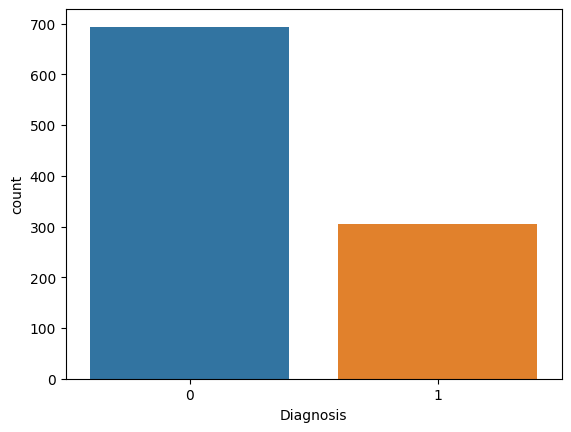

In [10]:
sns.countplot(data=data,x=y)
plt.show()

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'X' is your feature matrix and 'y' is your target vector
# X should contain all your features, and y should contain the corresponding labels

# Initialize RandomOverSampler to increase the number of samples labeled as 1
oversampler = RandomOverSampler(sampling_strategy=1)

# Oversample the minority class (class 1)
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

# Initialize RandomUnderSampler to decrease the number of samples of the majority class
undersampler = RandomUnderSampler(sampling_strategy='majority')  # Undersample majority class

# Undersample the majority class (class 0)
X_balanced, y_balanced = undersampler.fit_resample(X_oversampled, y_oversampled)

# Now X_balanced and y_balanced contain the balanced dataset


In [14]:
# Print the counts of each class after balancing the dataset
print("Counts after balancing:")
print(pd.Series(y).value_counts())


Counts after balancing:
Diagnosis
0    694
1    306
Name: count, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Create pipelines with StandardScaler and classifiers
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_lr', LogisticRegression())
])

pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_svm', SVC())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_dt', DecisionTreeClassifier())
])

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_knn', KNeighborsClassifier())
])

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_rf', RandomForestClassifier())
])

pipeline_nb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_nb', GaussianNB())
])

pipeline_gb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_gb', GradientBoostingClassifier())
])

pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('clf_xgb', xgb.XGBClassifier())
])

# Fit the pipelines
pipeline_lr.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_nb.fit(X_train, y_train)
pipeline_gb.fit(X_train, y_train)
pipeline_xgb.fit(X_train, y_train)

# Evaluate the models
accuracy_lr = pipeline_lr.score(X_test, y_test)
accuracy_svm = pipeline_svm.score(X_test, y_test)
accuracy_dt = pipeline_dt.score(X_test, y_test)
accuracy_knn = pipeline_knn.score(X_test, y_test)
accuracy_rf = pipeline_rf.score(X_test, y_test)
accuracy_nb = pipeline_nb.score(X_test, y_test)
accuracy_gb = pipeline_gb.score(X_test, y_test)
accuracy_xgb = pipeline_xgb.score(X_test, y_test)

print("Accuracy of Logistic Regression:", accuracy_lr)
print("Accuracy of SVM:", accuracy_svm)
print("Accuracy of Decision Tree:", accuracy_dt)
print("Accuracy of K-Nearest Neighbors:", accuracy_knn)
print("Accuracy of Random Forest:", accuracy_rf)
print("Accuracy of Naive Bayes:", accuracy_nb)
print("Accuracy of Gradient Boosting:", accuracy_gb)
print("Accuracy of XGBoost:", accuracy_xgb)


Accuracy of Logistic Regression: 0.685
Accuracy of SVM: 0.685
Accuracy of Decision Tree: 0.54
Accuracy of K-Nearest Neighbors: 0.61
Accuracy of Random Forest: 0.64
Accuracy of Naive Bayes: 0.675
Accuracy of Gradient Boosting: 0.63
Accuracy of XGBoost: 0.555


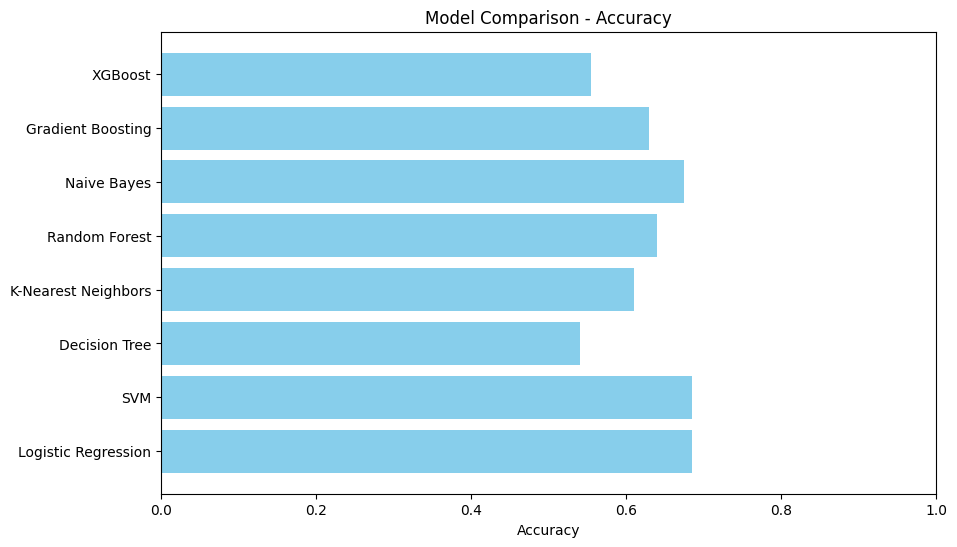

In [18]:
import matplotlib.pyplot as plt

# Store model names and their corresponding accuracies
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'K-Nearest Neighbors', 
          'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']
accuracies = [accuracy_lr, accuracy_svm, accuracy_dt, accuracy_knn, 
              accuracy_rf, accuracy_nb, accuracy_gb, accuracy_xgb]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 1)  # Set the x-axis limit to 0-1 for accuracy
plt.show()


Total number of data points in the dataset: 1000


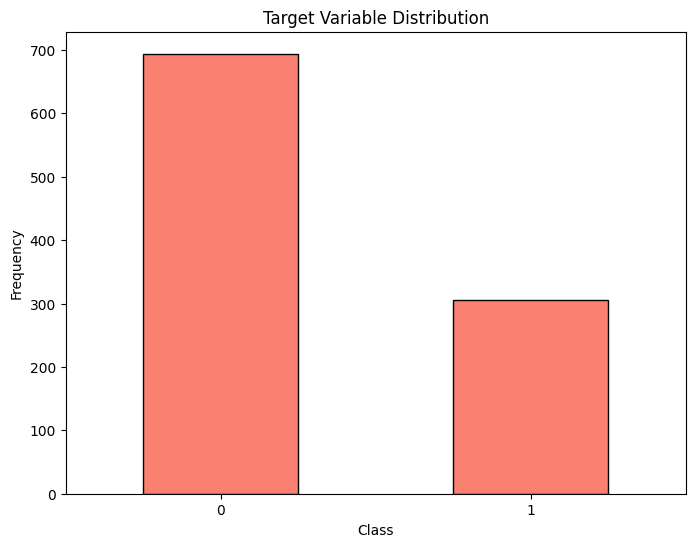

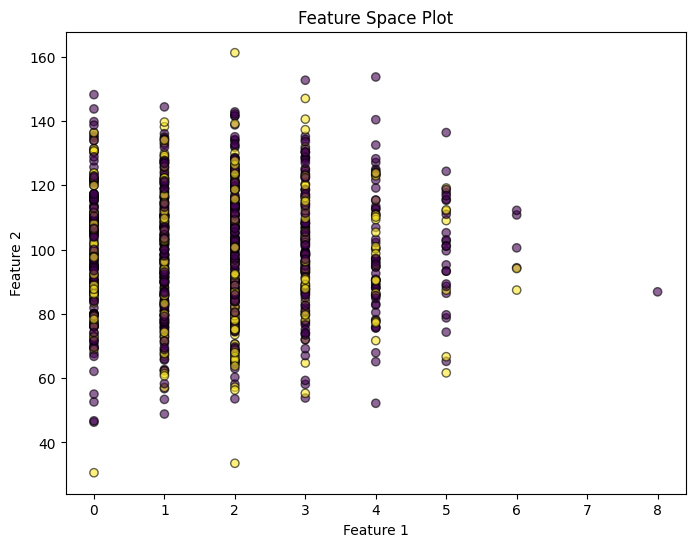

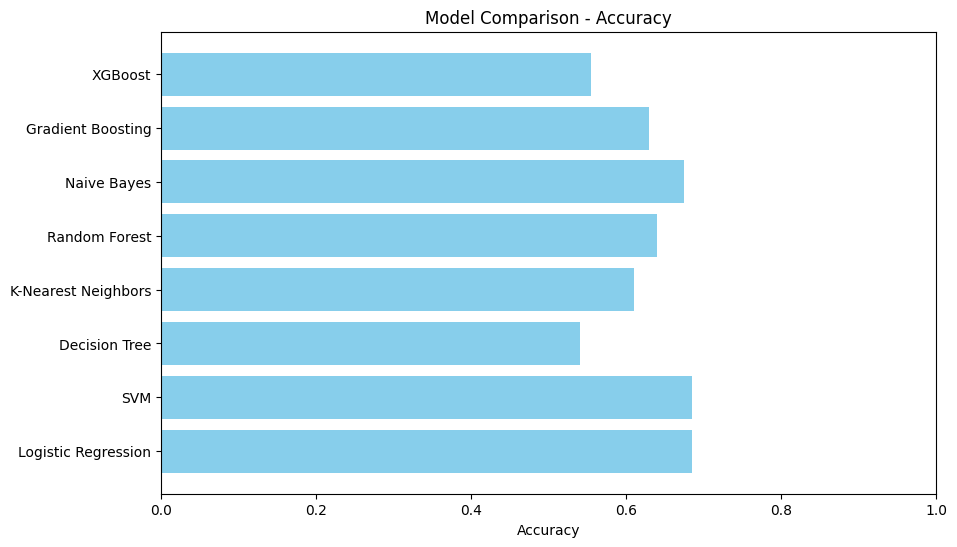

The final selected model is: Logistic Regression with an accuracy of 0.6850


In [20]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Assuming X and y are defined (feature matrix and target vector)

# 1) Number of total data points in the dataset
print("Total number of data points in the dataset:", len(X))

# 2) Plotting the value counts of y (target variable)
plt.figure(figsize=(8, 6))
y_value_counts = y.value_counts()
y_value_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Target Variable Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

# 3) Feature space plot (For simplicity, assuming 2D features. Use PCA/TSNE for higher dimensions)
plt.figure(figsize=(8, 6))
# Assuming X is a pandas DataFrame; if it's a numpy array, change to X[:, 0] and X[:, 1]
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.6)
plt.title('Feature Space Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 4) Model comparison graph (Accuracy of each model)
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'K-Nearest Neighbors', 
          'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']

# Assuming you have these variables defined with model accuracies
accuracies = [accuracy_lr, accuracy_svm, accuracy_dt, accuracy_knn, 
              accuracy_rf, accuracy_nb, accuracy_gb, accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xlim(0, 1)
plt.show()

# 5) Final selected model
accuracies_dict = {
    'Logistic Regression': accuracy_lr,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_dt,
    'K-Nearest Neighbors': accuracy_knn,
    'Random Forest': accuracy_rf,
    'Naive Bayes': accuracy_nb,
    'Gradient Boosting': accuracy_gb,
    'XGBoost': accuracy_xgb
}

best_model_name = max(accuracies_dict, key=accuracies_dict.get)
best_model_accuracy = accuracies_dict[best_model_name]

print(f"The final selected model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")
